# 1. Environment

In [11]:
import scanpy as sc
import os
import sys
import importlib
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, "/home/michal.kubacki/Githubs/Re-MEND/code/External_Datasets/GeneSet_Derivation/Herring_scenic/helpers")
import config
importlib.reload(config)
from config import *

In [12]:
#################################################################
reference = "hg19"


neurons_set = "all_cells"
# neurons_set = "all_excitatory"
# neurons_set = "all_inhibitory"
# neurons_set = "all_excitatory_all_ages"
# neurons_set = "all_inhibitory_all_ages"

cells_dict = {
    "all_inhibitory"            :   ['SST', 'VIP', 'MGE_dev'],
    "all_inhibitory_all_ages"   :   ['VIP', 'SST', 'PV', 'MGE_dev'],
    "all_excitatory"            :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "all_excitatory_all_ages"   :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "all_cells"                 :   ['L4_RORB', 'L2-3_CUX2', 'SST', 'Astro', 'L5-6_TLE4', 'L5-6_THEMIS', 'VIP', 'OPC', 'PV', 'PV_SCUBE3', 'Oligo', 'LAMP5_NOS1', 'Micro', 'MGE_dev', 'PN_dev', 'CGE_dev']
}

ages_dict = {
    "all_inhibitory"            :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_inhibitory_all_ages"   :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24'],
    "all_excitatory"            :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_excitatory_all_ages"   :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24'],
    "all_cells"                 :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24']
}


out_dir, in_dir, root_dir, tmp_dir, data_folder = set_output_folders(reference, neurons_set)

sel_celltypes  = cells_dict[neurons_set]
sel_ages = ages_dict[neurons_set]

#################################################################

root_dir: /group/testa/michal.kubacki/herring
out_dir: /group/testa/michal.kubacki/herring/output_hg19_all_excitatory_all_ages
in_dir: /group/testa/michal.kubacki/herring/data
tmp_dir: /group/testa/michal.kubacki/herring/tmp


# 2. Load data

In [13]:
file = "Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad"
file_path = os.path.join(in_dir, file)

In [14]:
adata = sc.read_h5ad(file_path)
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [15]:
adata

AnnData object with n_obs × n_vars = 154748 × 26747
    obs: 'batch', 'RL#', 'age', 'chem', 'concat_id', 'numerical_age', 'stage_id', 'Sex', 'Race', 'PMI', 'Brain Regions*', 'Cause of Death', 'ICD-10 Code', 'ICD-10 category', 'Oxygen/No Oxygen', 'Date-of-Collection', 'Collection_year', 'Library Prep Date', 'Library Prep Lot', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublet_score', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'mat/dev', 'cell_type', 'major_clust', 'sub_clust', 'combined-leiden', 'Astro_GFAP_dev-traj', 'Astro_SLC1A2_dev-traj', 'L2_CUX2_LAMP5_dev-traj', 'L3_CUX2_PRSS12_dev-traj', 'L4_RORB_LRRK1_dev-traj', 'L4_RORB_MET_dev-traj', 'L4_RORB_MME_dev-traj', 'L5-6_THEMIS_CNR1_dev-traj', 'L5-6_THEMIS_NTNG2_dev-traj', 'L5-6_TLE4_HTR2C_dev-traj', 'L5-6_TLE4_SCUBE1_dev-traj', 'L5-6_TLE4_SORCS1_dev-traj', 'Micro_dev-traj', 'OPC_dev-traj', 'OPC_MBP_dev-traj', 'Oligo_dev-traj', 'Vas_CLDN5_

In [21]:
print(list(adata.obs.cell_type.unique()))
print(list(adata.obs.major_clust.unique()))

['PN', 'IN', 'Non-Neu', 'Poor-Quality']
['L4_RORB', 'L2-3_CUX2', 'SST', 'Astro', 'L5-6_TLE4', 'L5-6_THEMIS', 'VIP', 'OPC', 'PV', 'PV_SCUBE3', 'ID2', 'Oligo', 'LAMP5_NOS1', 'Micro', 'Vas', 'MGE_dev', 'Poor-Quality', 'PN_dev', 'CGE_dev']


In [17]:
print(adata[adata.obs.cell_type == "PN", :].obs.major_clust.unique())
print(adata[adata.obs.cell_type == "IN", :].obs.major_clust.unique())


['L4_RORB', 'L2-3_CUX2', 'L5-6_TLE4', 'L5-6_THEMIS', 'PN_dev']
Categories (5, object): ['L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'L5-6_TLE4', 'PN_dev']
['SST', 'VIP', 'PV', 'PV_SCUBE3', 'ID2', 'LAMP5_NOS1', 'MGE_dev', 'CGE_dev']
Categories (8, object): ['VIP', 'ID2', 'LAMP5_NOS1', 'CGE_dev', 'SST', 'PV', 'PV_SCUBE3', 'MGE_dev']


In [19]:
adata.obs['major_clust'].value_counts()

Astro           25053
L2-3_CUX2       24316
Oligo           23450
L4_RORB         14668
OPC             11145
L5-6_TLE4        8845
L5-6_THEMIS      7713
SST              7491
VIP              6868
Micro            5672
ID2              4930
PV               3848
PN_dev           3827
MGE_dev          1612
Poor-Quality     1275
Vas              1223
CGE_dev           988
PV_SCUBE3         987
LAMP5_NOS1        837
Name: major_clust, dtype: int64

In [ ]:
adata.obs_names[:5]

Index(['AAACCTGAGAGTCGGT-RL1612_34d_v2', 'AAACCTGAGCCGCCTA-RL1612_34d_v2',
       'AAACCTGAGTCGAGTG-RL1612_34d_v2', 'AAACCTGAGTGAACAT-RL1612_34d_v2',
       'AAACCTGCAAGGACTG-RL1612_34d_v2', 'AAACCTGCAGGCGATA-RL1612_34d_v2',
       'AAACCTGCAGTGGGAT-RL1612_34d_v2', 'AAACCTGGTACTCAAC-RL1612_34d_v2',
       'AAACCTGGTCAAGCGA-RL1612_34d_v2', 'AAACCTGGTCATGCCG-RL1612_34d_v2',
       ...
       'TTTGTTGAGCGATTCT-RL2132_25yr_v3', 'TTTGTTGAGTTAGTGA-RL2132_25yr_v3',
       'TTTGTTGCAACAGTGG-RL2132_25yr_v3', 'TTTGTTGCAACTTGGT-RL2132_25yr_v3',
       'TTTGTTGCACAAGCTT-RL2132_25yr_v3', 'TTTGTTGCACCAGCGT-RL2132_25yr_v3',
       'TTTGTTGCACCGCTGA-RL2132_25yr_v3', 'TTTGTTGGTAAGGTCG-RL2132_25yr_v3',
       'TTTGTTGGTTCGGCTG-RL2132_25yr_v3', 'TTTGTTGTCGTCCTCA-RL2132_25yr_v3'],
      dtype='object', length=154748)

In [6]:
adata.X.sum(axis = 1)[:5]

matrix([[3079.],
        [9597.],
        [2185.],
        [7427.],
        [1122.]], dtype=float32)

In [7]:
adata.layers['ds_norm_cts'].sum(axis = 1)[:5]

matrix([[5001.39885875],
        [5182.51429164],
        [5269.29388843],
        [4869.52610557],
        [5166.5897827 ]])

# 3. Map ages

In [8]:
mapping = {
    '2d': '1m',
    '34d': '1m',
    '86d': '3m',
    '118d': '3m',
    '179d': '6m',
    '301d': '10m',
    '422d': '1y',
    '2yr': '2y',
    '627d': '2y',
    '3yr': '4y',
    '4yr': '4y',
    '6yr': '6y',
    '8yr': '8y',
    '10yr': '10y',
    '12yr': '14y',
    '14yr': '14y',
    '16yr': '16y',
    '17yr': '16y',
    '20yr': '20y',
    '25yr': '25y',
    '40yr': '40y',
    'ga22': 'ga22',
    'ga24': 'ga24',
    'ga34': 'ga24'
}

adata.obs["age_mapped"] = [mapping.get(age, age) for age in adata.obs.age]
adata.obs["age_mapped"].unique()

array(['1m', '2y', '8y', '3m', '16y', 'ga22', '6y', 'ga24', '6m', '4y',
       '10y', '10m', '20y', '40y', '1y', '14y', '25y'], dtype=object)

In [9]:
adata.obs['old_id'] = adata.obs_names

In [10]:
def process_obs_name(name):
    parts = name.split('-')[0]
    return parts

adata.obs['sample_id'] = adata.obs.old_id.apply(process_obs_name)

In [11]:
adata.obs['sample_id'] = adata.obs['sample_id'] + "-1-" + adata.obs["age_mapped"]
adata.obs_names = adata.obs['sample_id']

In [12]:
adata.obs_names = adata.obs_names.rename(None).astype(str)
adata.obs_names[:5]

Index(['AAACCTGAGAGTCGGT-1-1m', 'AAACCTGAGCCGCCTA-1-1m',
       'AAACCTGAGTCGAGTG-1-1m', 'AAACCTGAGTGAACAT-1-1m',
       'AAACCTGCAAGGACTG-1-1m', 'AAACCTGCAGGCGATA-1-1m',
       'AAACCTGCAGTGGGAT-1-1m', 'AAACCTGGTACTCAAC-1-1m',
       'AAACCTGGTCAAGCGA-1-1m', 'AAACCTGGTCATGCCG-1-1m',
       ...
       'TTTGTTGAGCGATTCT-1-25y', 'TTTGTTGAGTTAGTGA-1-25y',
       'TTTGTTGCAACAGTGG-1-25y', 'TTTGTTGCAACTTGGT-1-25y',
       'TTTGTTGCACAAGCTT-1-25y', 'TTTGTTGCACCAGCGT-1-25y',
       'TTTGTTGCACCGCTGA-1-25y', 'TTTGTTGGTAAGGTCG-1-25y',
       'TTTGTTGGTTCGGCTG-1-25y', 'TTTGTTGTCGTCCTCA-1-25y'],
      dtype='object', length=154748)

# 4. QC

In [13]:
adata.raw = adata

In [14]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

/home/michal.kubacki/.conda/envs/celloracle_env/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


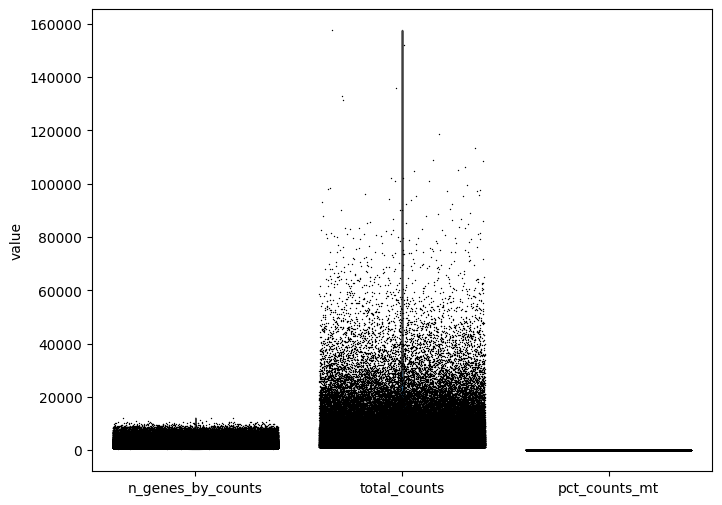

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=False,
    ax=ax
)

plt.show()

In [16]:
import numpy as np

print(f"Number of cells before filtering: {adata.n_obs}")

cell_type_to_exclude = 'none'

# percentiles for filtering criteria
min_genes_percentile = 5
max_genes_percentile = 95
min_counts_percentile = 5
max_counts_percentile = 95
max_mito_percentile = 98

min_genes = np.percentile(adata.obs['n_genes_by_counts'], min_genes_percentile)
max_genes = np.percentile(adata.obs['n_genes_by_counts'], max_genes_percentile)
min_counts = np.percentile(adata.obs['n_counts'], min_counts_percentile)
max_counts = np.percentile(adata.obs['n_counts'], max_counts_percentile)
max_mito = np.percentile(adata.obs['percent_mito'], max_mito_percentile)

mask = (adata.obs['n_genes_by_counts'] >= min_genes) & (adata.obs['n_genes_by_counts'] <= max_genes) & \
        (adata.obs['n_counts'] >= min_counts) & (adata.obs['n_counts'] <= max_counts) & \
        (adata.obs['percent_mito'] <= max_mito) | (adata.obs.major_clust==cell_type_to_exclude)

adata = adata[mask, :]

print(f"Number of cells after filtering: {adata.n_obs}")

/home/michal.kubacki/.conda/envs/celloracle_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [17]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

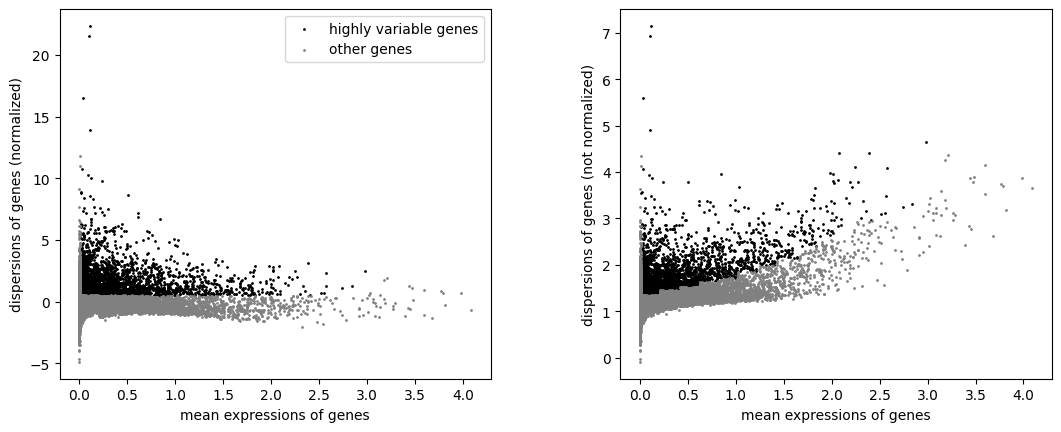

In [18]:
sc.pl.highly_variable_genes(adata)

In [19]:
adata = adata[:, adata.var.highly_variable]

In [20]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

/home/michal.kubacki/.conda/envs/celloracle_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
sc.pp.scale(adata, max_value=10)

In [22]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [25]:
adata = adata[adata.obs.age_mapped.isin(sel_ages)]

In [26]:
adata.shape

(92959, 3596)

In [28]:
adata = adata[adata.obs['major_clust'].isin(sel_celltypes)]

In [29]:
adata.write_h5ad(os.path.join(out_dir,  "adata.h5ad"))

In [30]:
adata.shape

(45539, 3596)

In [ ]:
for cell in adata.obs['major_clust'].unique():
    print(f"{cell}: {(adata.obs['major_clust']==cell).sum()}")